In [ ]:
!pip install ucimlrepo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,classification_report, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
heart_disease = fetch_ucirepo(name='Heart Disease')

In [ ]:
df = heart_disease.data["original"]

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76])

In [ ]:
df['sex'].unique()

array([1, 0])

In [ ]:
print(sum(df['sex'] == 1))  # men in dataset
print(sum(df['sex'] == 0))  # women in dataset

206
97


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df.shape

(297, 14)

In [ ]:
df['ca'].unique()

array([0., 3., 2., 1.])

# Gender Analysis

In [ ]:
df_male = df[(df['sex'] == 1)]
df_female = df[(df['sex'] == 0)]

num_male = df_male.shape[1]
num_female = df_male.shape[0]

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


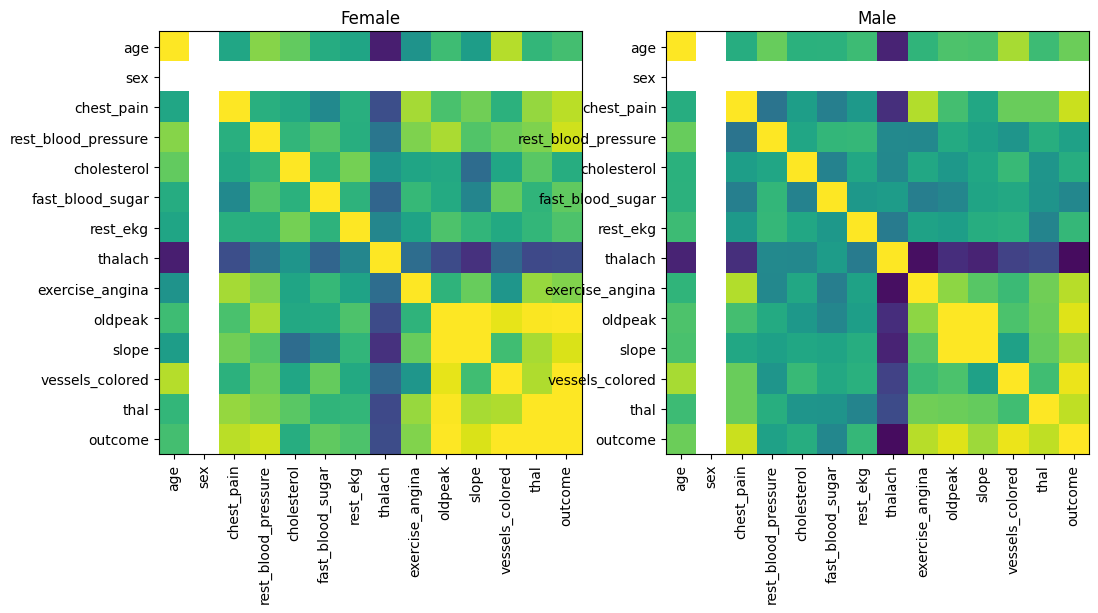

In [ ]:
#pairwise correlation across all features per gender group
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(np.corrcoef(df_female.T), vmin=-.5, vmax=.5)

plt.title('Female')
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.subplot(122)
plt.imshow(np.corrcoef(df_male.T), vmin=-.5, vmax=.5)

plt.title('Male')
plt.xticks(range(df.shape[1]),  df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.show()

In [ ]:
df = df.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalch':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()

In [ ]:
# Run the same log reg clf (stratified 10fold) for each gender group:
var_cat = ['chest_pain','fast_blood_sugar','rest_ekg','exercise_angina','slope','vessels_colored','thal']
n_it = 10
kf = StratifiedKFold(n_splits=n_it)

In [ ]:
clf = LogisticRegression(penalty='l1', solver='liblinear',tol=1e-6, max_iter=int(1e6), warm_start=True,intercept_scaling=10000., multi_class='ovr')

X = pd.get_dummies(df_female, columns=var_cat)
y_female = X["outcome"]
y_female[y_female > 0] = 1
X = X.drop(columns=['sex', 'outcome', 'fast_blood_sugar_0','exercise_angina_0'])
print(X.shape,X.columns)
accs = np.zeros(n_it)
coefs = []

(96, 24) Index(['age', 'rest_blood_pressure', 'cholesterol', 'thalach', 'oldpeak',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'fast_blood_sugar_1', 'rest_ekg_0', 'rest_ekg_1', 'rest_ekg_2',
       'exercise_angina_1', 'slope_1', 'slope_2', 'slope_3',
       'vessels_colored_0.0', 'vessels_colored_1.0', 'vessels_colored_2.0',
       'vessels_colored_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')


<ipython-input-260-be2f3cb63dca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_female[y_female > 0] = 1


In [ ]:
for it, (train, test) in enumerate(kf.split(X, y_female)):
    print(y_female.iloc[train].shape)
    clf.fit(X.iloc[train], y_female.iloc[train])
    y_true = y_female.iloc[test]
    y_pred = clf.predict(X.iloc[test])
    # print(y_pred.shape)
    accs[it] = accuracy_score(y_pred,y_true)
    # print(it, tr.shape, te.shape, accs[it])
    # print(clf.classes_)
    # print("coeffs: ", clf.coef_.shape)
    coefs.append(clf.coef_.ravel())
print('Female: %f+/-%f' % (np.mean(accs), np.std(accs)))
coefs_f = np.asarray(coefs)
cols_f = X.columns

(86,)
(10,)
0 (86,) (10,) 1.0
(86,)
(10,)
1 (86,) (10,) 0.9
(86,)
(10,)
2 (86,) (10,) 1.0
(86,)
(10,)
3 (86,) (10,) 0.9
(86,)
(10,)
4 (86,) (10,) 0.7
(86,)
(10,)
5 (86,) (10,) 0.8
(87,)
(9,)
6 (87,) (9,) 0.7777777777777778
(87,)
(9,)
7 (87,) (9,) 0.8888888888888888
(87,)
(9,)
8 (87,) (9,) 0.8888888888888888
(87,)
(9,)
9 (87,) (9,) 0.8888888888888888
Female: 0.874444+/-0.088757


In [ ]:
coefs_f.shape

(10, 24)

In [ ]:
# Male:
# y = df_male["num"]
# X = df_male.drop('num',axis=1)
# X = X.drop(columns=['sex','fbs','exang'])
X = pd.get_dummies(df_male, columns=var_cat)
y_male = X["outcome"]
y_male[y_male > 0] = 1
X = X.drop(columns=['sex','outcome', 'fast_blood_sugar_0','exercise_angina_0'])
print(X.shape,X.columns)
accs = np.zeros(n_it)
coefs = []
for it, (train, test) in enumerate(kf.split(X, y_male)):
    clf.fit(X.iloc[train], y_male.iloc[train])
    y_true = y_male.iloc[test]
    y_pred = clf.predict(X.iloc[test])
    accs[it] = accuracy_score(y_pred,y_true)
    # print(it,tr.shape,te.shape,accs[it])
    coefs.append(clf.coef_.ravel())
print('Male: %f+/-%f' % (np.mean(accs),np.std(accs)))
coefs_m = np.asarray(coefs)
cols_m = X.columns

<ipython-input-263-57b07a944d18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_male[y_male > 0] = 1


(201, 24) Index(['age', 'rest_blood_pressure', 'cholesterol', 'thalach', 'oldpeak',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'fast_blood_sugar_1', 'rest_ekg_0', 'rest_ekg_1', 'rest_ekg_2',
       'exercise_angina_1', 'slope_1', 'slope_2', 'slope_3',
       'vessels_colored_0.0', 'vessels_colored_1.0', 'vessels_colored_2.0',
       'vessels_colored_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')
0 (180,) (21,) 0.8571428571428571
1 (181,) (20,) 0.9
2 (181,) (20,) 0.7
3 (181,) (20,) 0.9
4 (181,) (20,) 0.8
5 (181,) (20,) 0.95
6 (181,) (20,) 0.65
7 (181,) (20,) 0.8
8 (181,) (20,) 0.8
9 (181,) (20,) 0.7
Male: 0.805714+/-0.093776


In [ ]:
coefs_m.shape

(10, 24)

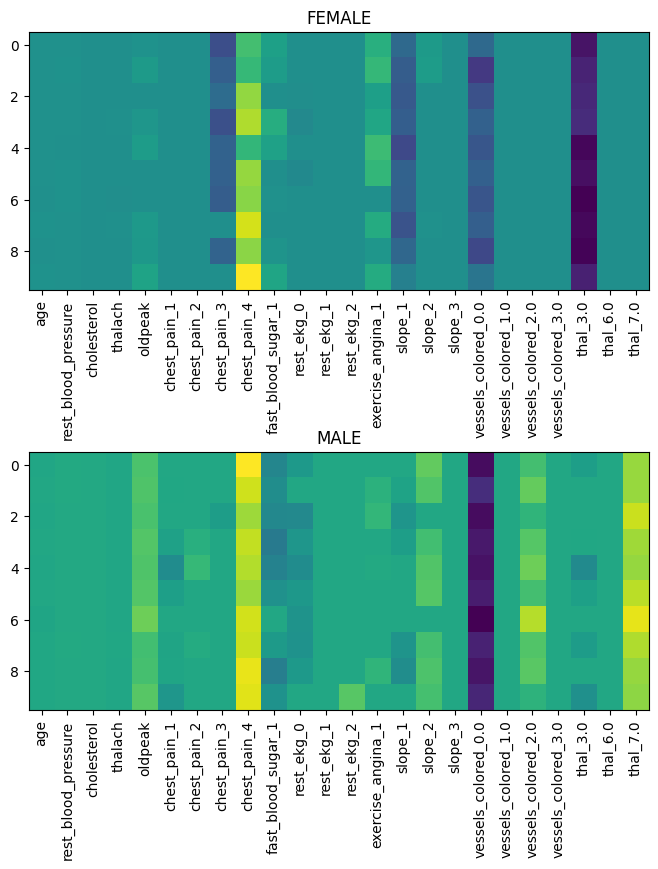

In [ ]:
plt.figure(figsize=(8, 10))
plt.subplot(211)
plt.imshow(coefs_f)
plt.xticks(range(len(cols_f)), cols_f, rotation=90)
plt.title('FEMALE')

plt.subplot(212)
plt.imshow(coefs_m)
plt.title('MALE')
plt.xticks(range(len(cols_m)), cols_m, rotation=90)
plt.show()

In [ ]:
df_female

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
18,48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,58,0,4,170,225,1,2,146,1,2.8,2,2.0,6.0,2
291,55,0,2,132,342,0,0,166,0,1.2,1,0.0,3.0,0
294,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1


In [ ]:
df_female

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
18,48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,58,0,4,170,225,1,2,146,1,2.8,2,2.0,6.0,2
291,55,0,2,132,342,0,0,166,0,1.2,1,0.0,3.0,0
294,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1


In [ ]:
from scipy import stats as spst
def visualize_by_gender(targ_feat):
    plt.figure(figsize=(12, 3))
    ax = plt.subplot(121)
    pd.crosstab(y_female, df_female[targ_feat]).plot(kind="bar", title=f'FEMALE {targ_feat}', ax=ax)
    plt.xticks([0, 1], ['Absent','Present'], rotation=0)

    ax = plt.subplot(122)
    pd.crosstab(y_male, df_male[targ_feat]).plot(kind="bar",title=f'MALE {targ_feat}', ax=ax)
    plt.xticks([0, 1], ['Absent', 'Present'], rotation=0)
    plt.show()

In [ ]:
df_female["oldpeak"].unique()

array([1.4, 3.6, 0.6, 1.3, 0.2, 1. , 1.6, 0. , 2.6, 1.8, 0.4, 0.8, 1.2,
       1.5, 0.5, 6.2, 3. , 4. , 1.9, 1.1, 2. , 0.7, 0.1, 3.4, 0.3, 0.9,
       2.8])

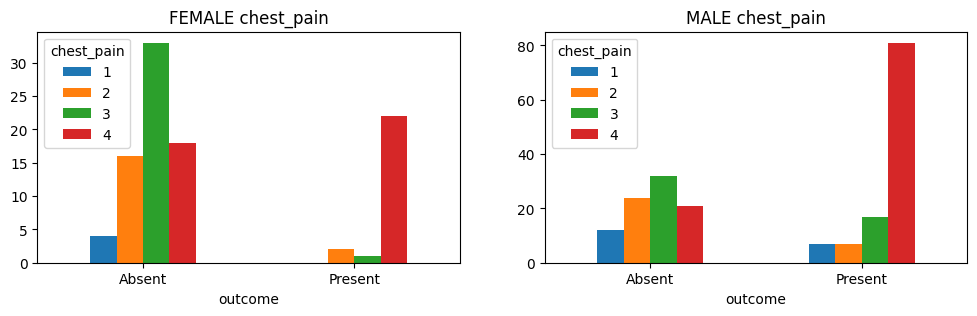

In [ ]:
visualize_by_gender('chest_pain')

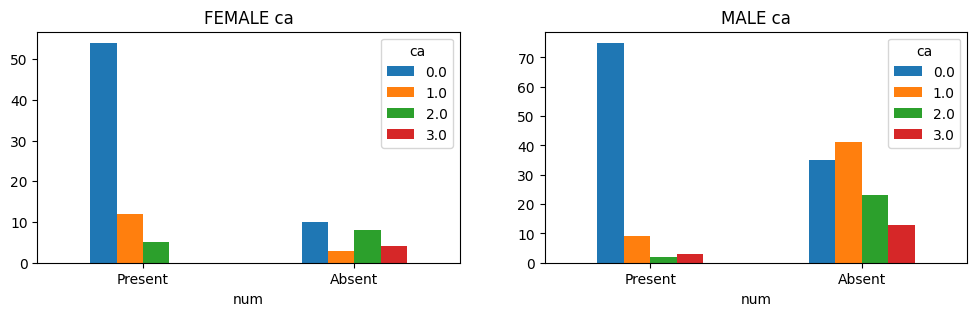

In [ ]:
visualize_by_gender('ca')

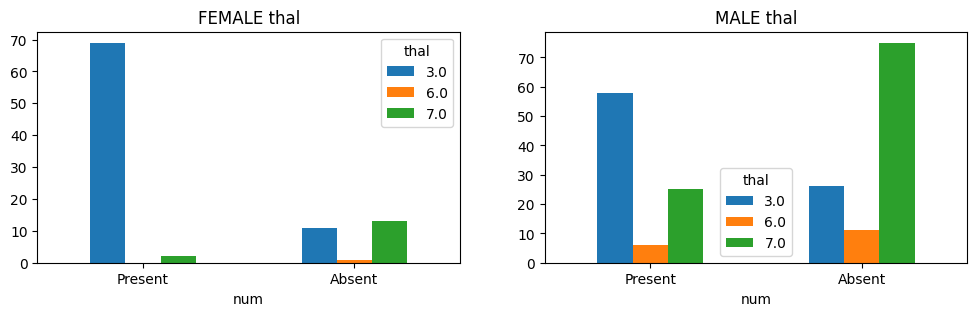

In [ ]:
visualize_by_gender('thal')

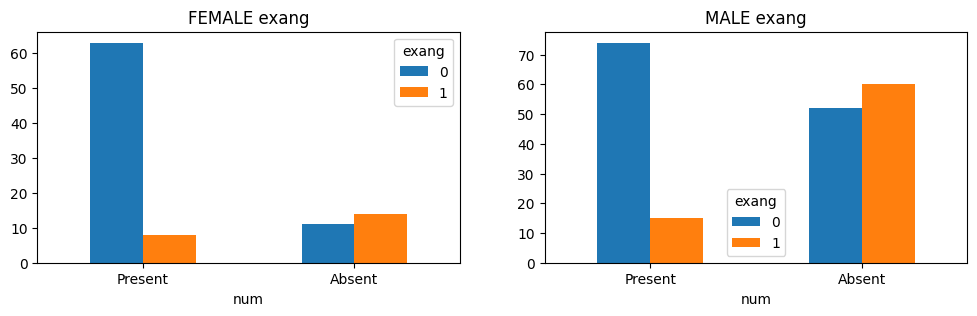

In [ ]:
visualize_by_gender('exang')

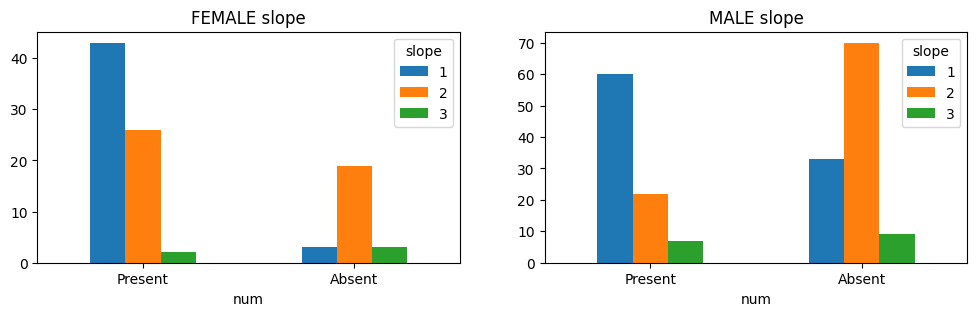

In [ ]:
visualize_by_gender('slope')

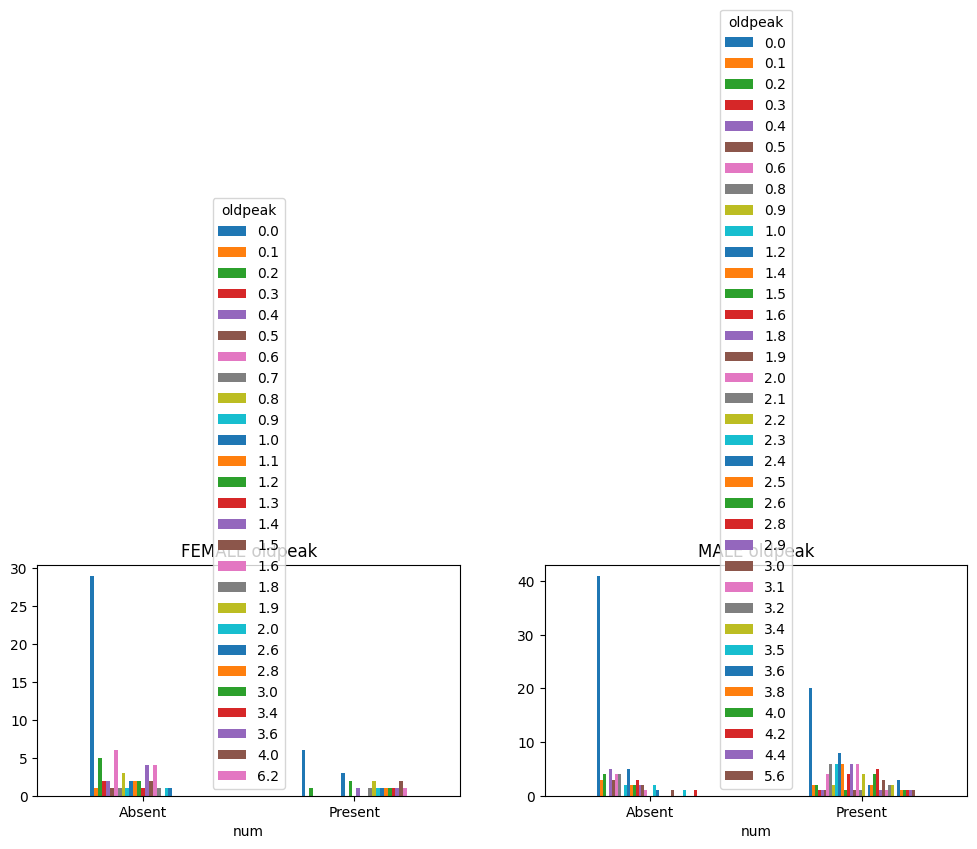

In [ ]:
visualize_by_gender("oldpeak")

# ATTEMPT 1

In [ ]:
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
# exploring the dataset

y = df["num"]
X = df.drop("num",axis=1)

print(sum(X.sex == 1)) # number of men in the dataset
print(sum(X.sex == 0)) # number of women in the dataset

y.unique()

206
97


array([0, 2, 1, 3, 4])

In [ ]:
## reference: https://www.kaggle.com/code/tauheedkhan123/heart-disease-prediction-using-machine-learning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

ValueError: ignored

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.6666666666666666



# ATTEMPT 2

In [ ]:
filtered_df = df.drop(columns=['ca', 'thal'])
filtered_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,2
2,67,1,4,120,229,0,2,129,1,2.6,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0


In [ ]:
# Referencing https://colab.research.google.com/drive/16iFRPq0vx_CZypo4ZyJ_qTLrvds3FlDb?usp=sharing#scrollTo=89rqWut1SsCu
# for decision tree, lin regression, and one hot encoding
# github link https://github.com/smarthardik10/Heart-Disease-UCI-Diagnosis-Prediction/tree/master

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

# print(filtered_df.shape)
# print(df.shape)
X = filtered_df.iloc[:,0:11] # Features
y = filtered_df.iloc[:,11] # Target variable
# # X = heart_disease.data.features
# # y = heart_disease.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5555555555555556
Accuracy: 0.5888888888888889


In [ ]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logre = LogisticRegression()
logre.fit(X_train,y_train)
y_pred = logre.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)
rf.oob_score_

y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6333333333333333

*italicized text*# New Section

# ATTEMPT 3

In [ ]:
df = df.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalch':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()

In [ ]:
df

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,thalach,exercise_angina,oldpeak,slope,vessels_colored,thal,outcome
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [ ]:
y = df["outcome"]
X = df.drop('outcome',axis=1)

In [ ]:
y[y > 0] = 1

<ipython-input-17-802de79f6097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y > 0] = 1


In [ ]:
y.unique()

array([0, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(y_train.unique())
print(sum(y_train == 0))
print(sum(y_train == 1))

[1 0]
130
107


confusion matrix
[[28  2]
 [ 8 22]]




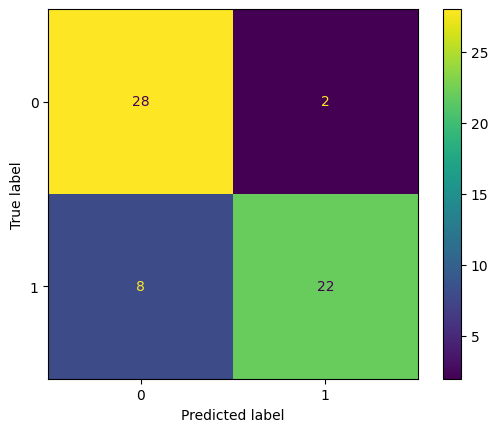

Accuracy of Logistic Regression: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("confusion matrix")
print(lr_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confusion matrix
[[28  2]
 [ 7 23]]




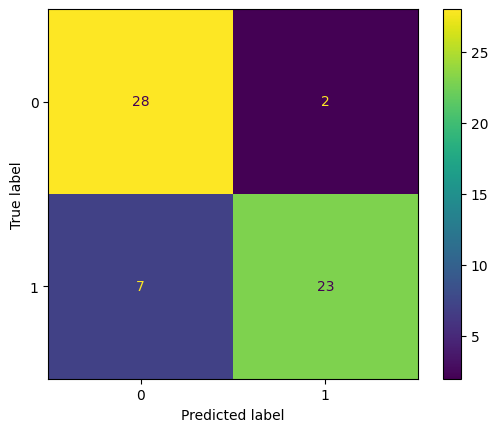

Accuracy of Naive Bayes model: 85.0 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        30

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [ ]:
X_test_men = X_test[X_test[:, 1] > 0]
y_test_men = y_test[X_test[:, 1] > 0]
X_test_women = X_test[X_test[:, 1] < 0]
y_test_women = y_test[X_test[:, 1] < 0]

nbpred_men = nb.predict(X_test_men)
nbpred_women = nb.predict(X_test_women)

nb_acc_score_men = accuracy_score(y_test_men, nbpred_men)
nb_acc_score_women = accuracy_score(y_test_women, nbpred_women)

print("Accuracy of Naive Bayes model for men:", nb_acc_score_men * 100,'\n')
print("Accuracy of Naive Bayes model for women:", nb_acc_score_women * 100,'\n')

Accuracy of Naive Bayes model for men: 81.3953488372093 

Accuracy of Naive Bayes model for women: 94.11764705882352 



In [ ]:
imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking
features = X.columns
features_ranked = []
importances_ranked = []
print("Feature ranking:")
for f in range(X_test.shape[1]):
   print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
   features_ranked.append(features[indices[f]])
   importances_ranked.append(importances[indices[f]])

Feature ranking:
1. oldpeak (0.063333)
2. thal (0.050000)
3. thalach (0.033333)
4. exercise_angina (0.030000)
5. chest_pain (0.026667)
6. vessels_colored (0.026667)
7. sex (0.023333)
8. slope (0.020000)
9. rest_ekg (0.016667)
10. age (0.003333)
11. fast_blood_sugar (0.000000)
12. cholesterol (0.000000)
13. rest_blood_pressure (0.000000)


In [ ]:
importances

array([0.00333333, 0.02333333, 0.02666667, 0.        , 0.        ,
       0.        , 0.01666667, 0.03333333, 0.03      , 0.06333333,
       0.02      , 0.02666667, 0.05      ])

<Axes: >

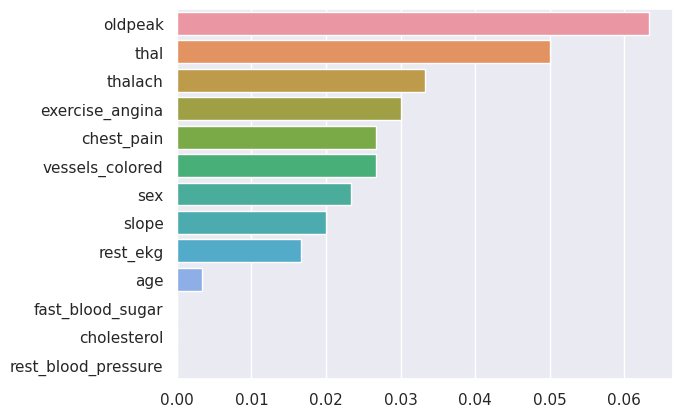

In [ ]:
import seaborn as sns
# sns.barplot(data=importances)
sns.set()
sns.barplot(x=importances_ranked,y=features_ranked)

In [ ]:
df_X_train = pd.DataFrame(X_train, columns=X.columns)
df_X_test = pd.DataFrame(X_test, columns=X.columns)

important_features = features_ranked[:7]
# important_features
df_X_train_new = df_X_train[important_features]
df_X_test_new = df_X_test[important_features]

X_train_new = df_X_train_new.to_numpy()
X_test_new = df_X_test_new.to_numpy()

In [ ]:
sum(df_X_test["sex"] < 0)

17

confusion matrix
[[28  2]
 [ 8 22]]




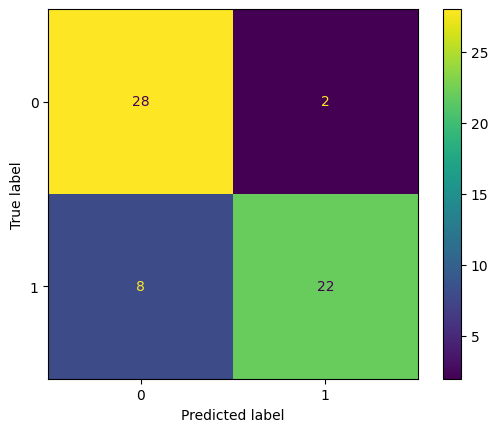

Accuracy of New Naive Bayes model: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [ ]:
m2_new = 'Naive Bayes w Top 7 Most Important Features'
nb_new = GaussianNB()
nb_new.fit(X_train_new, y_train)
nb_new_pred = nb_new.predict(X_test_new)
nb_new_conf_matrix = confusion_matrix(y_test, nb_new_pred)
nb_new_acc_score = accuracy_score(y_test, nb_new_pred)

print("confusion matrix")
print(nb_new_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_new_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of New Naive Bayes model:",nb_new_acc_score*100,'\n')
print(classification_report(y_test,nb_new_pred))

confusion matrix
[[26  4]
 [ 8 22]]




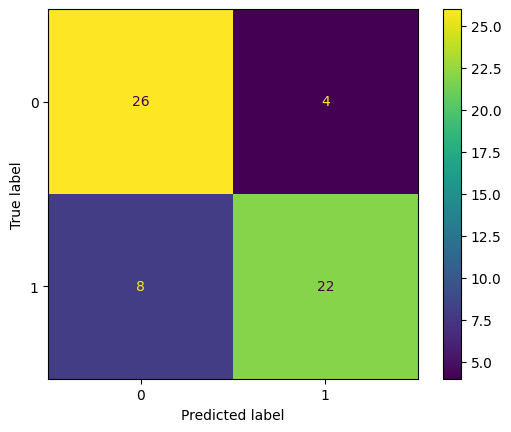

Accuracy of Random Forest: 80.0 

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confusion matrix")
print(rf_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Random Forest:",rf_acc_score * 100,'\n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[28  2]
 [13 17]]




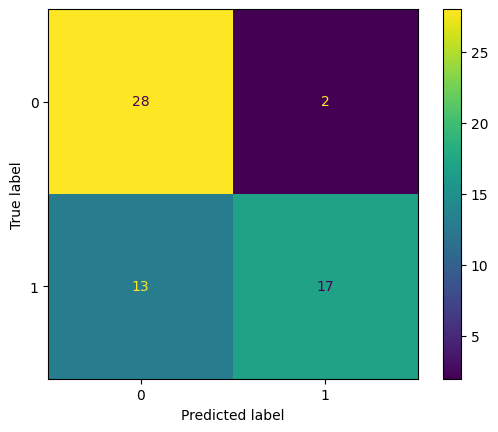

Accuracy of Extreme Gradient Boost: 75.0 

              precision    recall  f1-score   support

           0       0.68      0.93      0.79        30
           1       0.89      0.57      0.69        30

    accuracy                           0.75        60
   macro avg       0.79      0.75      0.74        60
weighted avg       0.79      0.75      0.74        60



In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("confusion matrix")
print(xgb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Extreme Gradient Boost:",xgb_acc_score * 100,'\n')
print(classification_report(y_test,xgb_predicted))

confusion matrix
[[28  2]
 [ 9 21]]




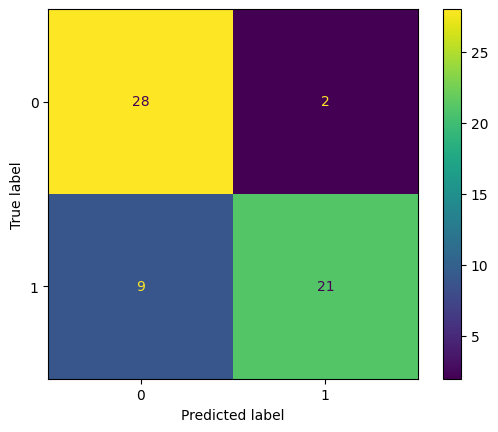

Accuracy of K-NeighborsClassifier: 81.66666666666667 

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.70      0.79        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.81        60
weighted avg       0.83      0.82      0.81        60



In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("confusion matrix")
print(knn_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

# Normalization

In [ ]:
## try w and w/o normalizing number of men & women
df = df.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalch':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()


In [ ]:
df.head()

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,thalach,exercise_angina,oldpeak,slope,vessels_colored,thal,outcome
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
18,48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,0


In [ ]:
df.isnull().sum()

age                    0
sex                    0
chest_pain             0
rest_blood_pressure    0
cholesterol            0
fast_blood_sugar       0
rest_ekg               0
thalach                0
exercise_angina        0
oldpeak                0
slope                  0
vessels_colored        0
thal                   0
outcome                0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

age                    0
sex                    0
chest_pain             0
rest_blood_pressure    0
cholesterol            0
fast_blood_sugar       0
rest_ekg               0
thalach                0
exercise_angina        0
oldpeak                0
slope                  0
vessels_colored        0
thal                   0
outcome                0
dtype: int64

In [ ]:
# idk try w/o scaling?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)


confusion matrix
[[10 14  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  1  0  1]
 [ 0  1  1  0  0]
 [ 0  1  0  0  0]]




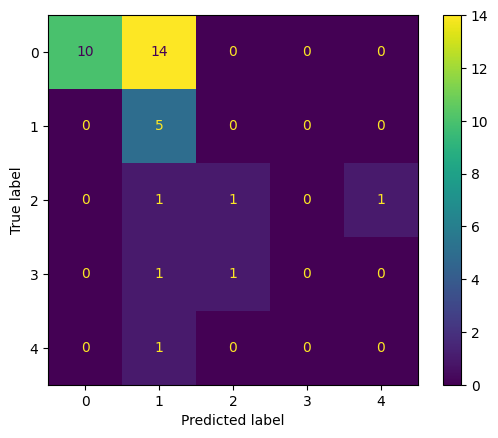

Accuracy of Naive Bayes model w/o Scaling: 45.714285714285715 

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.23      1.00      0.37         5
           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.46        35
   macro avg       0.35      0.35      0.27        35
weighted avg       0.76      0.46      0.49        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model w/o Scaling:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [ ]:
# try undersampling // currently giving same result as un-scaled, maybe the variables need to be renamed
import pandas as pd

# probably a better way than just rng ... but idk
male_indices = df[df.sex == 1].index
female_indices = df[df.sex == 0].index

print(len(male_indices))
print(len(female_indices))

random_male_indices = np.random.choice(male_indices, 79, replace=False)
random_male_sample = df.loc[random_male_indices]
print(random_male_sample.shape)

female_sample = df.loc[female_indices]
print(female_sample.shape)

df = pd.concat([female_sample, random_male_sample])
print(df.shape)

df.describe()

y = df["num"]
X = df.drop('num',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)


79
96
(79, 14)
(96, 14)
(175, 14)


confusion matrix
[[10 14  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  1  0  1]
 [ 0  1  1  0  0]
 [ 0  1  0  0  0]]




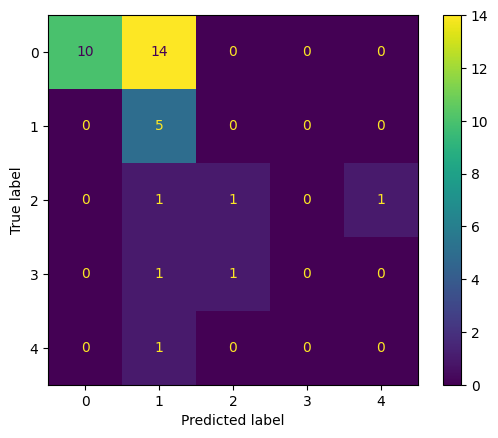

Accuracy of Naive Bayes model w/o Scaling: 45.714285714285715 

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.23      1.00      0.37         5
           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.46        35
   macro avg       0.35      0.35      0.27        35
weighted avg       0.76      0.46      0.49        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model w/o Scaling:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [ ]:
# try oversampling